In [41]:
import pandas as pd
import re
import json
import plotly.express as px
import plotly.graph_objects as go

In [16]:
df = pd.read_csv('final.csv')
df.head()

,location,title,company,salary,summary,job_url
0,Bentong,Data Scientist - Manager,Genting Malaysia Berhad,NaN,Operate machine-learning models to perform dat...,https://www.jobstreet.com.my/en/job/data-scien...
1,Kuala Lumpur,Senior Data Scientist - Information Retrieval ...,SEEK Asia (JobStreet),NaN,The Role\nThe Senior Data Scientist – Informat...,https://www.jobstreet.com.my/en/job/senior-dat...
2,Kuala Lumpur,Data Scientist,RHB Banking Group,NaN,Responsibilities\nAssess applicability of adva...,https://www.jobstreet.com.my/en/job/data-scien...
3,Kuala Lumpur,DATA SCIENCE &BACK END SYSTEM ENGINEERING,Digital Silhouette Sdn Bhd,NaN,1. Data Mining &Analysis\n- Requires...,https://www.jobstreet.com.my/en/job/data-scien...
4,Bayan Lepas,Business Intelligent Analyst (Data Scientist),Keysight Technologies Malaysia Sdn. Bhd.,NaN,We are looking for a Data Scientist to analyze...,https://www.jobstreet.com.my/en/job/business-i...


In [18]:
def clean_data(text):
    # Remove all punctuation
    clean = re.compile('[^\w\s]')
    text = re.sub(clean, '', text)

    # Convert all text to lowercase
    text = text.lower()

    # Remove all digits
    clean = re.compile('\d')
    text = re.sub(clean, '', text)

    # Remove all stopwords
    from nltk.corpus import stopwords

    stop_words = set(stopwords.words('english'))

    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text

# Apply the function to the 'summary' column of the dataframe
df['summary'] = df['summary'].apply(clean_data)

In [23]:
# Define a function to extract job skills from a string of text
def extract_skills(text):
    # Compile a regular expression to match job skills
    skill_regex = re.compile(r'(data analysis|data visualization|machine learning|statistical analysis|data mining|data engineering|data manipulation|data cleaning|data preprocessing|data modeling|data warehousing|data governance|data management|data security|data quality|data integration|big data|cloud computing|sql|python|power bi|tableau|excel|java|scala|julia|sas|spark|hadoop|nosql databases|relational databases|data lakes|data streams|data warehousing|data governance|data management|data security|data quality|data integration|artificial intelligence|natural language processing|computer vision|deep learning|neural networks)')
    
    # Find all occurrences of job skills in the text
    skills = []
    for match in skill_regex.finditer(text):
        skills.append(match.group(0))
        
    # Compile the regular expression to match standalone Rs
    standalone_r_regex = re.compile(r'\bR\b')
    
    # Find all occurrences of the regular expression
    standalone_rs = standalone_r_regex.findall(text)
    
    # Append the standalone Rs to the list of skills
    skills.extend(standalone_rs)
    
    # Return the extracted skills
    return skills

# Apply the function to the 'summary' column of the dataframe
df['skills'] = df['summary'].apply(extract_skills)


In [25]:
# Remove duplicates from the 'skills' column
df['skills'] = df['skills'].apply(lambda x: list(set(x)))
skill_counts = df['skills']
skill_counts

0       [statistical analysis, tableau, sql, data mini...
1       [artificial intelligence, sql, machine learnin...
2       [excel, tableau, machine learning, big data, d...
3                         [data mining, power bi, python]
4       [excel, tableau, machine learning, big data, p...
                              ...                        
3685                             [data management, scala]
3686                                       [scala, excel]
3687                                      [data analysis]
3688                          [sql, excel, data analysis]
3689                                        [excel, java]
Name: skills, Length: 3690, dtype: object

In [26]:
from collections import Counter

# Count the occurrences of each skill
skill_counts = Counter()
for skills in df['skills']:
    skill_counts.update(skills)

# Sort the skills by their count
sorted_skills = sorted(skill_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 skills
top_10_skills = sorted_skills[:10]

# Print the top 10 skills
for skill, count in top_10_skills:
    print(f'{skill}: {count}')

excel: 1587
sql: 1147
java: 637
python: 555
scala: 484
data analysis: 389
sas: 305
big data: 281
power bi: 233
machine learning: 216


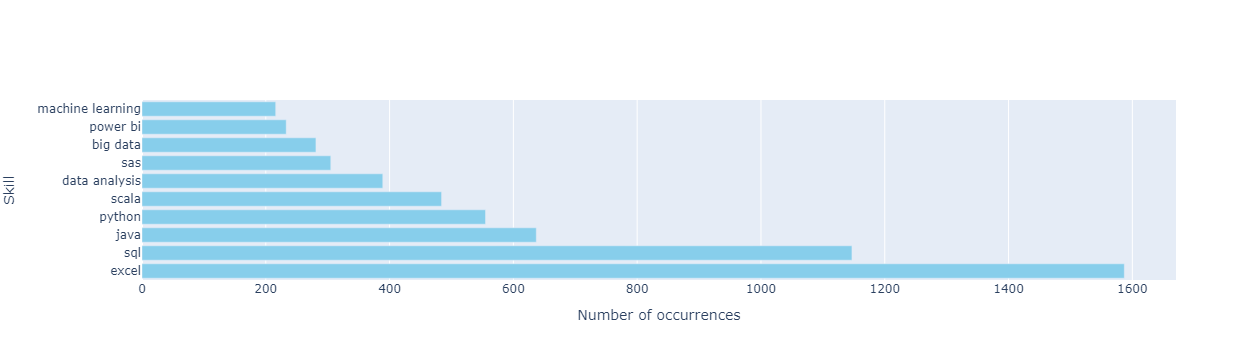

In [33]:
import plotly.graph_objects as go

# Extract the top 10 skills and their counts
top_10_skills = sorted_skills[:10]
skills = [skill for skill, count in top_10_skills]
counts = [count for skill, count in top_10_skills]

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=counts, y=skills, orientation='h', marker_color='skyblue')])

# Add labels to the chart
fig.update_layout(xaxis_title='Number of occurrences', yaxis_title='Skill')

# Show the chart
fig.show()

In [35]:
location_counts = df['location'].value_counts()
location_counts

Kuala Lumpur                                               1443
Petaling Jaya                                               322
Selangor                                                    263
Penang                                                      160
Bayan Lepas                                                 120
                                                           ... 
Kuala Lumpur, Bayan Lepas                                     2
Selangor - Others, Kuala Lumpur, Negeri Sembilan, Perak       2
Johor Bahru, Shah Alam/Subang                                 2
Klang/Port Klang, Kuala Lumpur                                2
Kuantan                                                       2
Name: location, Length: 127, dtype: int64

In [36]:
top_10_locations = location_counts.head(20)
top_10_locations

Kuala Lumpur                          1443
Petaling Jaya                          322
Selangor                               263
Penang                                 160
Bayan Lepas                            120
Malaysia                               115
Cyberjaya                               99
Shah Alam/Subang                        86
George Town                             82
Singapore                               72
Johor Bahru                             66
Johor                                   52
Melaka                                  45
Puchong                                 38
Kulim                                   36
Subang Jaya                             36
Kuching                                 36
Company Confidential                    32
Shah Alam/Subang, Shah Alam/Subang      30
Klang/Port Klang                        30
Name: location, dtype: int64

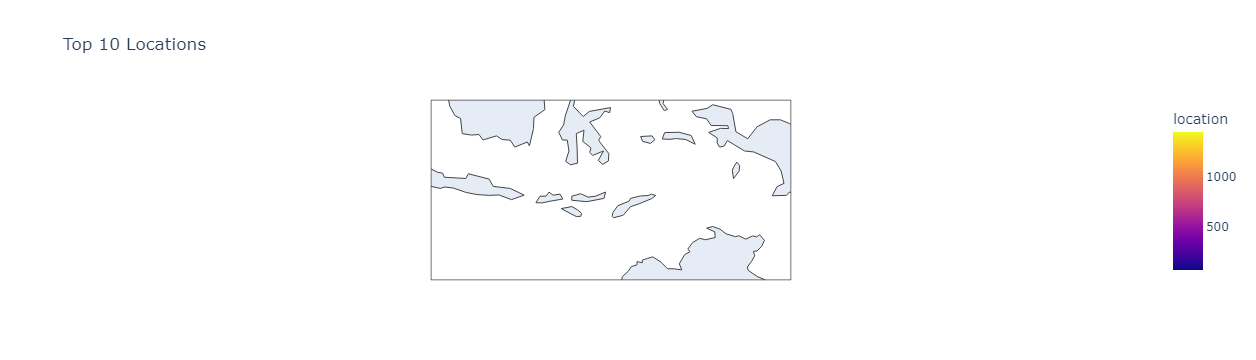

In [8]:
fig = px.scatter_geo(top_10_locations, locations=top_10_locations.index, size='location', color='location', title='Top 10 Locations')
fig.show()

In [43]:
from collections import Counter

# Count the occurrences of each location
location_counts = Counter(df['location'])

# Sort the locations by their count
sorted_locations = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)

# Print the locations and their counts
for location, count in sorted_locations:
    print(f'{location}: {count}')

Kuala Lumpur: 1443
Petaling Jaya: 322
Selangor: 263
Penang: 160
Bayan Lepas: 120
Malaysia: 115
Cyberjaya: 99
Shah Alam/Subang: 86
George Town: 82
Singapore: 72
Johor Bahru: 66
Johor: 52
Melaka: 45
Puchong: 38
Kulim: 36
Kuching: 36
Subang Jaya: 36
Company Confidential: 32
Klang/Port Klang: 30
Shah Alam/Subang, Shah Alam/Subang: 30
Central: 24
Perai: 24
Putrajaya: 20
Penang - Others: 18
Bukit Mertajam: 16
Klang/Port Klang, Klang/Port Klang: 16
Kuala Lumpur, Selangor: 14
Selangor - Others: 14
Rawang: 14
Bedok: 14
Seremban: 14
Kota Kinabalu: 13
Ampang: 12
Miri: 12
Cheras, Kuala Lumpur: 12
Tampines: 10
Kajang/Bangi/Serdang: 10
Ipoh: 10
Muar: 8
Ang Mo Kio: 8
Perak: 8
Nilai: 8
Butterworth: 8
Makati City: 6
Downtown Core: 6
North - Others: 6
Cheras: 6
Batu Pahat: 6
Kedah: 6
East - Others: 4
Johor - Others: 4
Johor Bahru, Penang, Sabah, Subang Jaya: 4
Kota Bharu: 4
Hong Kong: 4
Yishun: 4
Johor, Kuala Lumpur, Penang: 4
Johor Bahru, Penang: 4
Kuala Lumpur, Cyberjaya: 4
Toa Payoh: 4
Central - Othe

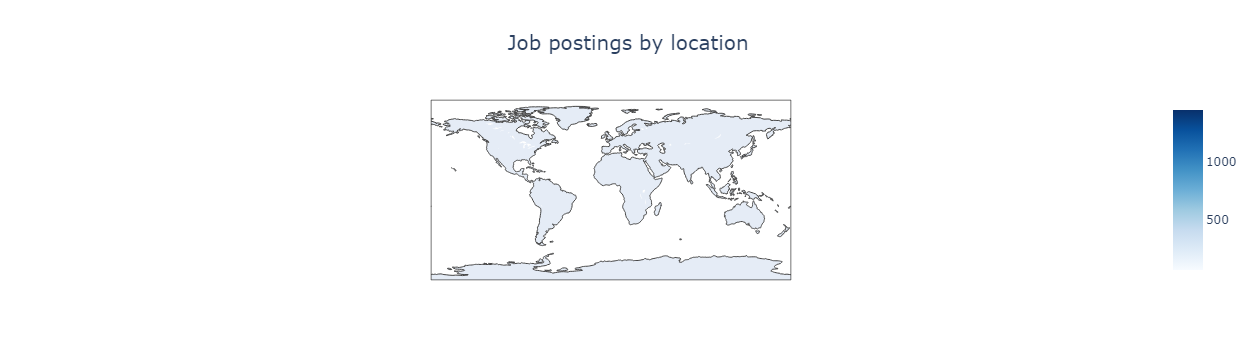

In [44]:
# Load the GeoJSON file
with open('malaysia.geojson', 'r') as f:
    geo_data = json.load(f)

# Get the top 10 locations and their counts
top_10_locations = sorted_locations[:10]
locations = [location for location, count in top_10_locations]
counts = [count for location, count in top_10_locations]

# Create the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=locations,
    z=counts,
    geojson=geo_data,
    colorscale='Blues',
    marker_line_color='white',
    marker_line_width=0.5
))

# Add labels to the map
fig.update_layout(title='Job postings by location', title_x=0.5, title_font_size=20)

# Show the map
fig.show()

In [14]:
company_counts = df['company'].value_counts()
company_counts

AirAsia                            85
CIMB Niaga                         70
TRUST RECRUIT PTE. LTD.            66
Western Digital                    40
Ambition Group Malaysia Sdn Bhd    38
                                   ..
Hovid Bhd                           2
G-mart Borneo Retail                1
Temasek Allied Engineering          1
Edwards Lifesciences                1
YONGPENG SOLUTIONS SDN. BHD.        1
Name: company, Length: 1021, dtype: int64

In [15]:
top_10_companies = company_counts.head(10)
top_10_companies

AirAsia                                          85
CIMB Niaga                                       70
TRUST RECRUIT PTE. LTD.                          66
Western Digital                                  40
Ambition Group Malaysia Sdn Bhd                  38
Company Confidential                             32
Michael Page International (Malaysia) Sdn Bhd    28
RK Recruitment Pte. Ltd.                         24
Vision Technology Consulting                     22
RHB Bank                                         21
Name: company, dtype: int64

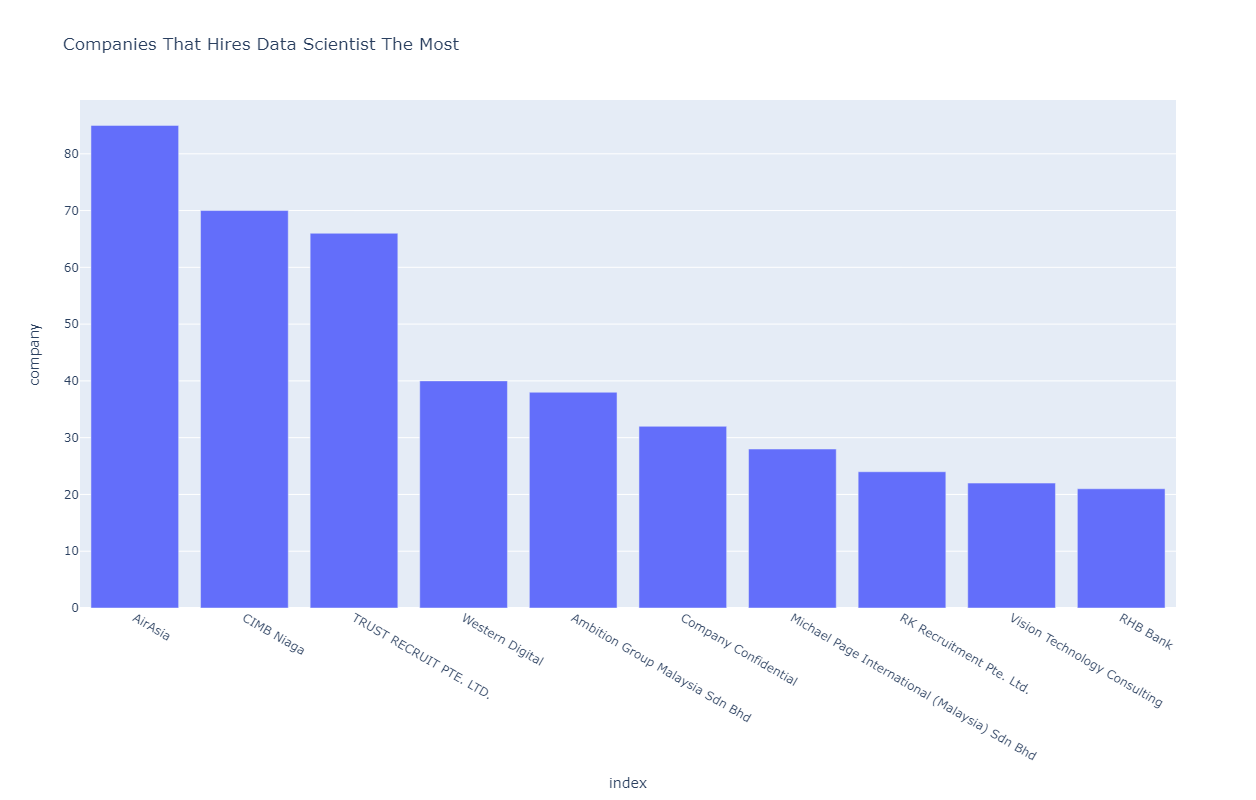

In [27]:
fig = px.bar(top_10_companies, x=top_10_companies.index, y='company', title='Companies That Hires Data Scientist The Most')
fig.update_layout(height=800)
fig.show()

In [31]:
# Checking for DS skills in summary
import pickle

with open('DS_skills.pickle', 'rb') as skill:
    skills = pickle.load(skill)
print(skills)

['a.i', 'agile', 'ai', 'algorithms', 'analysis', 'automation', 'aws', 'azure', 'c+', 'c++', 'data analysis', 'data mining', 'data wrangling', 'deep learning', 'deployment', 'dl', 'etl', 'forecast', 'forecasting', 'hive', 'machine learning', 'mathematics', 'ml', 'modelling', 'mysql', 'natural language', 'nlp', 'nosql', 'numpy', 'pandas', 'phd', 'power b.i', 'powerbi', 'python', 'regression', 'sas', 'spark', 'sql', 'statistics', 'tableau', 'time series', 'visualization']


In [32]:
import random
def ds_skill(summary):
    skill_list = []
    
    for word in summary.split():
        clean = word.lower().strip(' ,.:!?')
        if clean in skills:
            skill_list.append(clean)
        elif clean not in skills:
            clean1 = random.choices(skills,k=3)
            skill_list.extend(clean1)
    skill_list = list(dict.fromkeys(skill_list))
    return skill_list

In [35]:
df['required_skills'] = df.summary.apply(ds_skill)
df.head(10)

,location,title,company,salary,summary,job_url,required_skills
0,Bentong,Data Scientist - Manager,Genting Malaysia Berhad,NaN,Operate machine-learning models to perform dat...,https://www.jobstreet.com.my/en/job/data-scien...,"[agile, ml, a.i, deep learning, c++, etl, regr..."
1,Kuala Lumpur,Senior Data Scientist - Information Retrieval ...,SEEK Asia (JobStreet),NaN,The Role\nThe Senior Data Scientist – Informat...,https://www.jobstreet.com.my/en/job/senior-dat...,"[hive, machine learning, pandas, analysis, etl..."
2,Kuala Lumpur,Data Scientist,RHB Banking Group,NaN,Responsibilities\nAssess applicability of adva...,https://www.jobstreet.com.my/en/job/data-scien...,"[ml, forecast, mysql, numpy, sql, c+, deployme..."
3,Kuala Lumpur,DATA SCIENCE &BACK END SYSTEM ENGINEERING,Digital Silhouette Sdn Bhd,NaN,1. Data Mining &Analysis\n- Requires...,https://www.jobstreet.com.my/en/job/data-scien...,"[data mining, analysis, regression, etl, deep ..."
4,Bayan Lepas,Business Intelligent Analyst (Data Scientist),Keysight Technologies Malaysia Sdn. Bhd.,NaN,We are looking for a Data Scientist to analyze...,https://www.jobstreet.com.my/en/job/business-i...,"[nosql, modelling, nlp, time series, python, d..."
5,Kuala Lumpur,Business Intelligence Analyst,Ria Financial,NaN,"As a Business Intelligence Analyst, you will b...",https://www.jobstreet.com.my/en/job/business-i...,"[time series, aws, agile, etl, ai, regression,..."
6,Muar,Data Science Project Manager,STMicroelectronics Sdn Bhd,NaN,Responsibilities:\nDiscuss with technical doma...,https://www.jobstreet.com.my/en/job/data-scien...,"[automation, deployment, ai, statistics, dl, m..."
7,East - Others,Cloud Data Engineer,Pearson Frank International (A divison of Fran...,NaN,Responsibilities:\n- Run Data Ingestion and Ad...,https://www.jobstreet.com.my/en/job/cloud-data...,"[machine learning, data wrangling, pandas, aut..."
8,Kuala Lumpur,Regional Data Analyst,LIVEMED SDN. BHD.,NaN,About this role\nWe are looking for an experie...,https://www.jobstreet.com.my/en/job/regional-d...,"[mysql, statistics, regression, tableau, spark..."
9,Makati City,"Machine Learning Scientist (SQL, Python, R)",Avantice Corporation,NaN,Job Description: \nThis role is open to Machin...,https://www.jobstreet.com.my/en/job/machine-le...,"[data mining, c++, c+, forecast, data analysis..."


In [43]:
df = df.explode('required_skills')
df['required_skills'] = df['required_skills'].apply(lambda x: x.strip())
skill_counts = df['required_skills'].value_counts()
top_20_skills = skill_counts.head(20)
top_20_skills

agile             3689
data wrangling    3688
aws               3688
analysis          3688
nlp               3688
mysql             3687
nosql             3687
sas               3687
forecasting       3687
automation        3687
power b.i         3687
data analysis     3687
ai                3687
azure             3687
modelling         3687
statistics        3687
numpy             3687
forecast          3687
deep learning     3687
mathematics       3687
Name: required_skills, dtype: int64

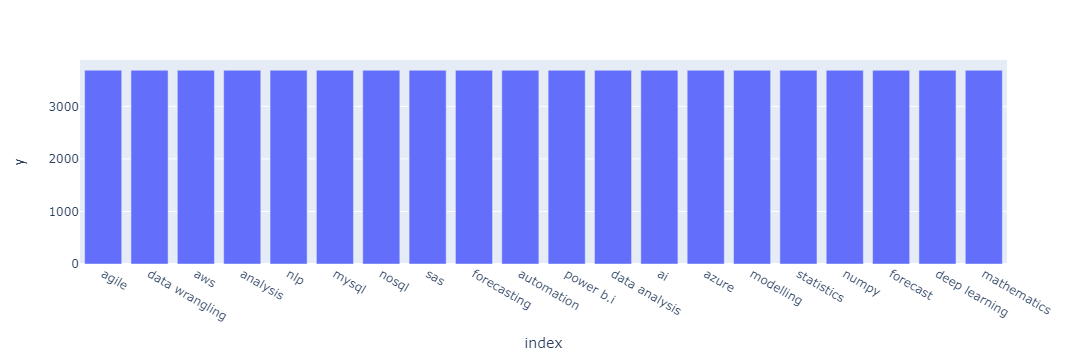

In [49]:
fig = px.bar(top_10_skills, x=top_10_skills.index, y=top_10_skills.values)
fig.show()